#**Actividad 7**
Algebra lineal con Scipy\ Utilizaremos la biblioteca scipy.linalg para operar con vectores y matrices (Arreglos de NumPy: 1-D, 2-D, 3-D, etc).

In [2]:
 #Cargamos las bibliotecas para trabajar con Algebra Lineal

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Definimos un arreglo 2-D
# Una matriz M de dimensión 2 (2-D)
A=np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [4]:
# Propiedades del arreglo anterior. 
print('Número de dimensiones:', A.ndim)
print('Forma (shape):', A.shape)
print('Tamaño (size):', A.size)

Número de dimensiones: 2
Forma (shape): (2, 2)
Tamaño (size): 4


In [5]:
col = A[:,1] 
print(col)

[2 4]


In [6]:
# Definimos nuevamente un arreglo 2-D
# Una matriz M de dimensión 2 (2-D)
B=np.array([[10,12],[14,-16]])
print(B)

[[ 10  12]
 [ 14 -16]]


In [7]:
# Propiedades del arreglo anterior. 
print('Número de dimensiones:', B.ndim)
print('Forma (shape):', B.shape)
print('Tamaño (size):', B.size)

Número de dimensiones: 2
Forma (shape): (2, 2)
Tamaño (size): 4


In [8]:
#Realizamos un calculo simple MULTIPLICACION
A*B

array([[ 10,  24],
       [ 42, -64]])

In [9]:
A@A

array([[ 7, 10],
       [15, 22]])

#**EJERCICIO** **1**
Definir un par de matrices y la matriz identidad, luego realizar el siguiente calculo:
ecuación
$$2 * I + 3 * A + A @ B.$$

Para definir la matriz identidad, se puede utilizar la función **np.eye(2, dtype=int)**. Ver manual de **np.eye()**.


**Potencias de Matrices**

No existe un símbolo para denotar las potencias de matrices. Por eso definimos la función '**mpow**' en la 1a celda de bibliotecas.

**from numpy.linalg import matrix_power as mpow**

In [10]:
# Definimos un arreglo 2-D con la función eye que sera nuestra mariz identidad
# Una matriz M de dimensión 2 (2-D)
I=np.eye(2, dtype=int)
print(I)

[[1 0]
 [0 1]]


In [11]:
#solo para confirmar resultado
#Calcular el resultado
C = (2*I) 
print('El resultado es')
print(C)
D = (3*A)
print('El resultado es')
print (D)
E = (A*B)
print('El resultado es')
print (E)
F = C + D + E 
print("el resultado total es:")
print (F)

El resultado es
[[2 0]
 [0 2]]
El resultado es
[[ 3  6]
 [ 9 12]]
El resultado es
[[ 10  24]
 [ 42 -64]]
el resultado total es:
[[ 15  30]
 [ 51 -50]]


In [12]:
#Calcular el resultado
C= (2*I)+(3*A)+(A*B) 
#print('El resultado es')
print(C)

[[ 15  30]
 [ 51 -50]]


In [13]:
#Calcular el resultado
C_2= (2*I)+(3*A)+(A@B) 
#print('El resultado es')
print(C)

[[ 15  30]
 [ 51 -50]]


#**Actividad** **2**
Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
$$y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

**Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).**


In [14]:
# Definimos una matriz M
M=np.array([[11,9],[4,-6]])
print(M)

[[11  9]
 [ 4 -6]]


In [15]:
# Hacemos la traza de la Matriz M
tr_M=np.trace(M)
# El determinante de la Matriz M 
det_M=la.det(M)
#Matriz de identidad
I=np.eye(2, dtype=int)

#Probando el teorema Cayley-Hamilton
P=mpow(M,2) - tr_M*M + det_M * I
print(P)
#print(det_M)

[[0. 0.]
 [0. 0.]]


#**Actividad** **3**
Resolver el siguiente sistema de ecuacines: 
$$
x-3y+z=1
$$
$$
3x-4y+z=5
$$
$$
2y-z=0
$$
Utilizando el **Metodo de eliminacion Gaussiana** y la utilizando la funcion **scipy.linalg.solve()**





In [16]:
#Metodo de eliminacion Gaussiana
#Resscribiendo el SE en una matrix
def switch_rows(A,i,j):
  "Intercambiar renglones i y j en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=0
  E[j,j]=0
  E[i,j]=1
  E[j,i]=1
  return E @ A

# Multiplicar un renglón por un aconstante no nula.
def scale_row(A,k,i):
  "Multiplicar el renglón i por k en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=k
  return E @ A

# Sumar un múltiplo de un renglón a otro renglón.
def add_row(A,k,i,j):
  "Sumar k vaces el renglón j al renglón i en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  if i== j:
    E[i,j]=k+1
  else:
    E[i,j]=k
  return E @ A

In [17]:
#Definimos la matriz F:
F = np.array([[1,-3,1,1],[3,-4,1,5],[0,2,-1,0]])
print("Matriz F = ")
print(F)

Matriz F = 
[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]]


In [18]:
#Comenzando con la eliminacion
F1 = (scale_row(F,3,0))
print(scale_row(F,3,0))

[[ 3. -9.  3.  3.]
 [ 3. -4.  1.  5.]
 [ 0.  2. -1.  0.]]


In [19]:
F2 = add_row(F1,-1,1,0)
print(F2)

[[ 3. -9.  3.  3.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]


In [20]:
F3 = scale_row(F2,2,1)
F4 = scale_row(F3,5,2)
print(F4)

[[ 3. -9.  3.  3.]
 [ 0. 10. -4.  4.]
 [ 0. 10. -5.  0.]]


In [21]:
F5 = add_row(F4,-1,2,1)
print(F5)

[[ 3. -9.  3.  3.]
 [ 0. 10. -4.  4.]
 [ 0.  0. -1. -4.]]


De aqui podemos obtener el valor de Z que es: 
$$
Z=4
$$
Pero una vez obtenido el valor de Z podemos sustituirlo en la segunda ecuacion:
$$
10y-4(4)=4
$$
$$
10y-16=4
$$
$$
10y=20
$$
Por lo tanto el valor de Y es:
$$
Y=2
$$
Una vez obenido el valor de Y y Z podemos sustituirlo en la primer ecuacion para obtener el valor de X
$$
3x-9(2)+3(4)=3
$$
$$
3x-18+12=3
$$
$$
3x-6=3
$$
Por lo que el valor de X es:
$$
X=3
$$

In [22]:
#Ahora utilizando la funcion spicy.linalg.solve()
# Definiendo el vector b
b=np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [23]:
#Definimos la matriz que vamos a utilizar:
G = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print("Matriz G = ")
print(G)

Matriz G = 
[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]


In [24]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
G_sol = la.solve(G, b)
print(G_sol)

[[3.]
 [2.]
 [4.]]


Por lo tanto podemos notar que los resultado por el metodo de eliminacion Gaussiana y el anterior dan el **MISMO RESULTADO**

#**Actividad** **4**
Dada las siguientes matrices B_1,B_2, B_3: 
(Ejemplo tomado de Wikipedia  sobre Eigenvalores y Eigenvectores)

\begin{equation}
B_1=
  \begin{bmatrix}
  2 & 0 & 0\\
  0 & 3 & 4\\
  0 & 4 & 9
  \end{bmatrix}
\end{equation}\\
\begin{equation}
B_2=
  \begin{bmatrix}
  0 & 1 & 0\\
  0 & 0 & 1\\
  1 & 0 & 0
  \end{bmatrix}
\end{equation}\\
\begin{equation}
B_3=
  \begin{bmatrix}
  2 & 0 & 0 & 0\\
  1 & 2 & 0 & 0\\
  0 & 1 & 3 & 0\\
  0 & 0 & 1 & 3
  \end{bmatrix}
\end{equation}

Encontrar los **Eigenvalores** y los **Eigenvectores** de cada mariz utilizando la funcion de **spicy.linalg.eig(), y contrastar los resultados en cada uno de los casos con los que se desarrollan en los ejemplos de Wiki...

In [25]:
#Definiendo la matrix B1
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
print("Matriz B1 = ")
print(B1)

Matriz B1 = 
[[2 0 0]
 [0 3 4]
 [0 4 9]]


In [26]:
# Aplicamos scipy.linalg.eig() e n B1
eigvals, eigvecs = la.eig(B1)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [27]:

#Definimos la matrix B2:
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
print("Matriz B2 = ")
print(B2)

Matriz B2 = 
[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [28]:
# Aplicamos scipy.linalg.eig() e n B2
eigvals, eigvecs = la.eig(B2)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]


In [29]:
#Definimos la matrix B3:
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print("Matriz B3 = ")
print(B3)

Matriz B3 = 
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [30]:
# Aplicamos scipy.linalg.eig() e n B3
eigvals, eigvecs = la.eig(B3)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


#**Actividad** **5**
se tienen los siguientes 8 puntos 
$$(x , y)$$
$$(0.0 , 0.0)$$
$$(0.5 , 0.47942)$$
$$(1.0 , 0.84147)$$
$$(1.5 , 0.99749)$$
$$(2.0 , 0.90930)$$
$$(2.5 , 0.59847)$$
$$(3.0 , 0.14112)$$
$$(3.5 , -0.35078)$$

Encuentrar un polinomio inerpolante ***p(x)*** que pase por los 8 puntos.
Sobreponga la funcion:

$$y=sin(x)$$

Y contrastela con el polinomio de ***p(x)***



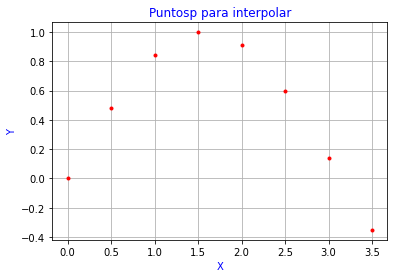

In [38]:
#Hacemos la interpolación con un polinimio de grado 7 para el total de los 8 puntos.
x = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
y = np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078])

# Gráficamos los puntos dados.
plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntosp para interpolar', color='Blue')
plt.xlabel('X', color='Blue')
plt.ylabel('Y', color='Blue')
plt.show()

In [39]:
# Creamos la matrix de vandemonde, e imprimimos los primeros renglones y columnas
X = np.column_stack([x**k for k in range (0,8)])
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [40]:
#La biblioteca Numpy conttiene una función para crear la matrix de Vandemonde
X = np.vander(x, increasing=True)
#Solo imprimimos los primeros 5 renglones y columnas
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [41]:
# Ahora utilizamos la función de scipy.linalg.solve(), para encontrar los 8 coeficientes 
# de la solución lineal X_a=y
a = la.solve(X,y)
print(np.round(a,1))

[ 0.   1.  -0.  -0.2 -0.   0.  -0.   0. ]


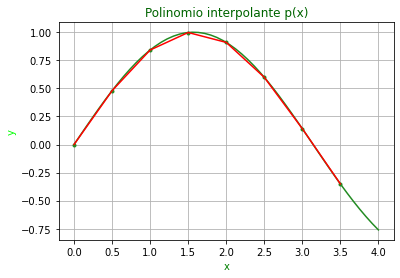

In [44]:
#Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en verde 'r.
xs = np.linspace(0,4,50)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys,color='forestgreen')
plt.plot(x, np.sin(x), color='red')
plt.grid()
plt.title('Polinomio interpolante p(x)', color='darkgreen')
plt.xlabel('x',color='green')
plt.ylabel('y', color='lime')
plt.show()

#**Actividad** **6**.
 Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas $(T_{max}$ y $T_{min})$, y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas  $(T_{max},T_{min})$ están subiendo o bajando en el periodo analizado.


**NOTA**: Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones.